# Explanatory Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from wordcloud import WordCloud

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv(r"C:\Users\Mcc\Desktop\12 Projects\Project 1 - Movie Analysis\Resources\movies_complete.csv", parse_dates=["release_date"])

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

__Movies Top 5 - Highest Revenue__

In [16]:
df_best = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count','vote_average', 'popularity', 'genres', 'cast']]
df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df_best['return'] = df.revenue_musd.div(df.budget_musd)

df_best.columns = ['', 'Title', 'Budget', 'Revenue', 'Votes', 'Average Rating', 'Popularity', 'Genres', 'Cast', 'Profit', 'ROI']
df_best.set_index('Title', inplace=True)
df_best.Budget.fillna(0, inplace=True)
df_best.Votes.fillna(0, inplace=True)

C:\Users\Mcc\AppData\Local\Temp\ipykernel_20172\1911783603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
C:\Users\Mcc\AppData\Local\Temp\ipykernel_20172\1911783603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['return'] = df.revenue_musd.div(df.budget_musd)
C:\Users\Mcc\AppData\Local\Temp\ipykernel_20172\1911783603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [4]:
def best_worst(n, by, ascending=False, min_bud = 0, min_votes = 0):
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes),["", by]].sort_values(by = by, ascending=ascending).head(n).copy()
    return HTML(df2.to_html(escape=False))

# best_worst(n=5,by='ROI',min_bud=5, min_votes = 1000)

__Movies Top 5 - Highest Budget__

In [5]:
best_worst(n=5,by='Budget',min_bud=5, min_votes = 1000)

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
John Carter,,260.00


__Movies Top 5 - Highest Profit__

In [86]:
# With Function
best_worst(n=5,by='Profit',min_bud=5, min_votes = 1000)

# Or Manually
# df_best_revenue = df_best[df_best['Budget'] >= 5]
# df_best_revenue = df_best_revenue[df_best_revenue['Votes'] > 1000]
# df_best_revenue.sort_values(by='ROI', ascending=False)

,,Profit,Votes,Average Rating
Title,,,,
Avatar,,2550.97,12114.00,7.20
Star Wars: The Force Awakens,,1823.22,7993.00,7.50
Titanic,,1645.03,7770.00,7.50
Jurassic World,,1363.53,8842.00,6.50
Furious 7,,1316.25,4253.00,7.30


__Movies Top 5 - Lowest Profit__

In [85]:
best_worst(n=5,by='Profit',ascending=True,min_bud=5, min_votes = 1000)

,,Profit,Votes,Average Rating
Title,,,,
The Lone Ranger,,-165.71,2361.00,5.90
R.I.P.D.,,-68.35,1280.00,5.40
Upside Down,,-51.89,1094.00,6.20
The Iron Giant,,-46.84,1470.00,7.60
Mr. Nobody,,-43.45,1616.00,7.90


__Movies Top 5 - Highest ROI__

In [88]:
best_worst(n=5,by='ROI',ascending=False,min_bud=5, min_votes = 1000)

,,ROI,Votes,Average Rating
Title,,,,
E.T. the Extra-Terrestrial,,75.52,3359.00,7.30
Star Wars,,70.49,6778.00,8.10
Jaws,,67.24,2628.00,7.50
The Exorcist,,55.16,2046.00,7.50
Get Out,,50.49,2978.00,7.20


__Movies Top 5 - Lowest ROI__

In [89]:
best_worst(n=5,by='ROI',ascending=True,min_bud=5, min_votes = 1000)

,,ROI,Votes,Average Rating
Title,,,,
Mr. Nobody,,0.08,1616.00,7.90
Upside Down,,0.14,1094.00,6.20
Donnie Darko,,0.21,3574.00,7.70
Equilibrium,,0.27,1584.00,6.90
The Interview,,0.28,2340.00,6.10


__Movies Top 5 - Most Votes__

In [92]:
best_worst(n=5,by='Votes',ascending=False,min_bud=5, min_votes = 1000)

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [93]:
best_worst(n=5,by='Average Rating',ascending=False,min_bud=5, min_votes = 1000)

,,Average Rating
Title,,
The Godfather,,8.50
The Shawshank Redemption,,8.50
Fight Club,,8.30
The Godfather: Part II,,8.30
Life Is Beautiful,,8.30


__Movies Top 5 - Lowest Rating__

In [94]:
best_worst(n=5,by='Average Rating',ascending=True,min_bud=5, min_votes = 1000)

,,Average Rating
Title,,
Batman & Robin,,4.20
Fantastic Four,,4.40
Ghost Rider: Spirit of Vengeance,,4.70
The Last Airbender,,4.70
Rings,,4.80


__Movies Top 5 - Most Popular__

In [95]:
best_worst(n=5,by='Popularity',ascending=False,min_bud=5, min_votes = 1000)

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [66]:
mask_genres = df.genres.str.contains("Science Fiction") & df.genres.str.contains("Action")
mask_actor = df.cast.str.contains("Bruce Willis")
mask_director = df.director == "Quentin Tarantino"
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)
mask_time = df.release_date.between("2010-01-01", "2015-12-31")
mask_language = df.original_language == "en"
mask_vote_av = df.vote_average >= 7.5
mask_vote_co  = df.vote_count >= 10

df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by="vote_average", ascending=False)
bruce = df.loc[mask_actor & mask_genres, ["title","poster_path", "vote_average"]].sort_values(by="vote_average", ascending=False)
HTML(bruce.to_html(escape=False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.30
19218,Looper,,6.60
1786,Armageddon,,6.50
14135,Surrogates,,5.90
20333,G.I. Joe: Retaliation,,5.40
27619,Vice,,4.10


In [69]:
def best_worst_filtered(n, by, ascending=False, **kwargs):
    filters = {}
    for key, value in kwargs.items():
        if value != '%':
            # Handling multiple genres using isin() method
            if isinstance(value, list):
                filters[key] = df[key].isin(value)
            else:
                filters[key] = df[key].str.contains(value)
            # Handling NaN values using pd.notna() or pd.notnull()
            filters[key] = filters[key] & pd.notna(df[key])
    filtered_df = df.copy()
    for key, value in filters.items():
        filtered_df = filtered_df.loc[value]
    sorted_df = filtered_df[["title","poster_path",by]].sort_values(by=by, ascending=ascending).head(n)
    return HTML(sorted_df.to_html(escape=False))

best_worst_filtered(n=5, by='vote_average', genres='Science Fiction', cast='Bruce Willis', ascending=False)


,title,poster_path,vote_average
31,Twelve Monkeys,,7.40
1448,The Fifth Element,,7.30
3836,Unbreakable,,6.90
19218,Looper,,6.60
1786,Armageddon,,6.50


In [78]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

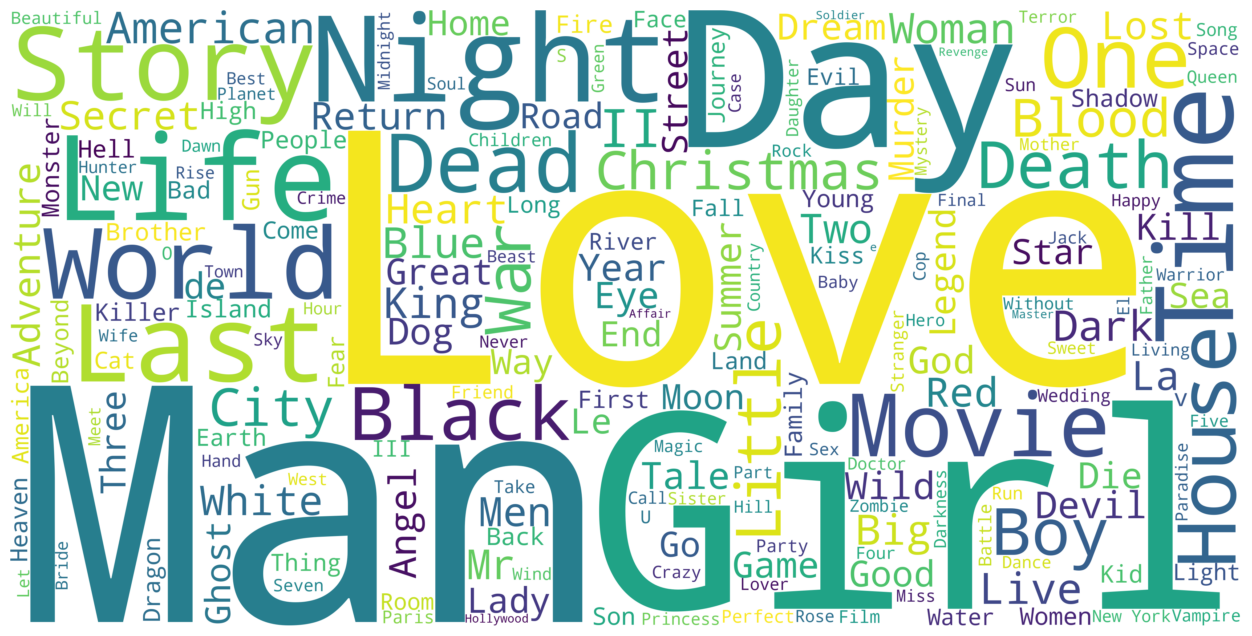

In [80]:
title_wordcloud = WordCloud(background_color='white', height = 2000, width = 4000, max_words = 200).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

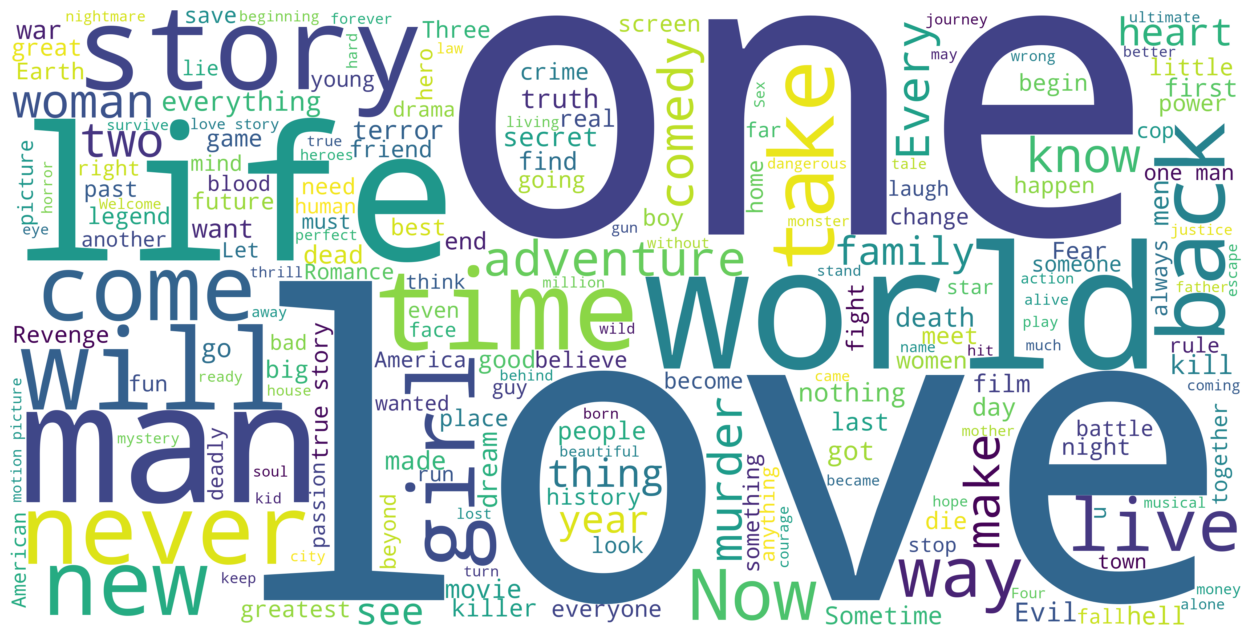

In [81]:
tagline_wordcloud = WordCloud(background_color='white', height = 2000, width = 4000, max_words = 200).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

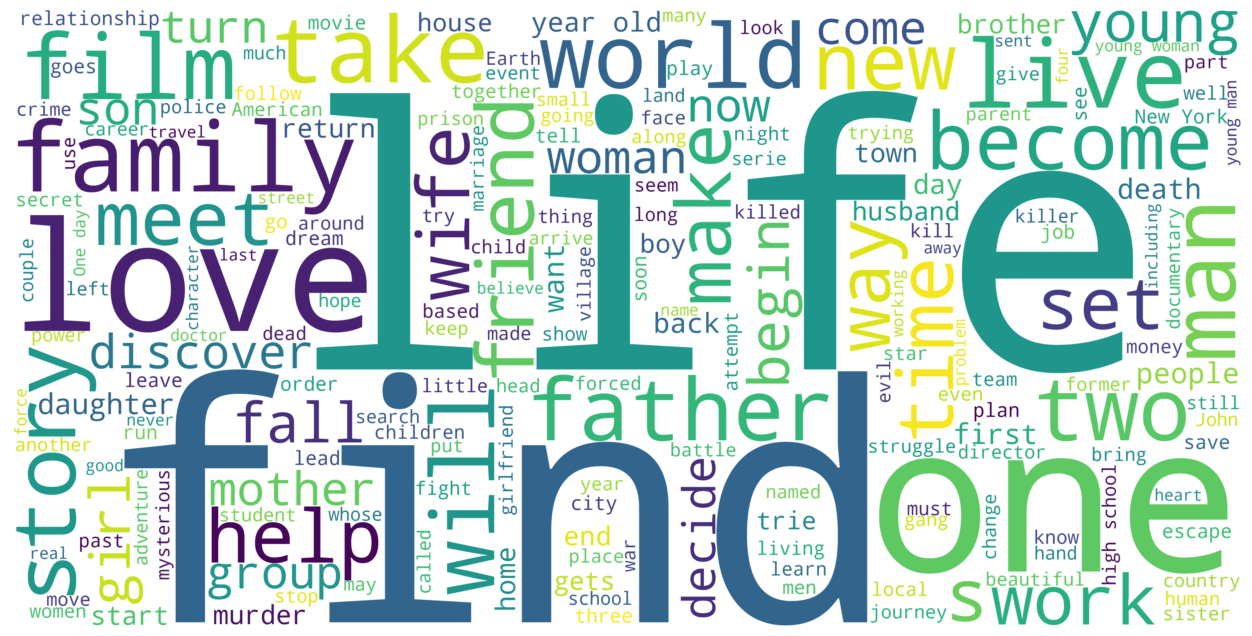

In [82]:
overview_wordcloud = WordCloud(background_color='white', height = 2000, width = 4000, max_words = 200).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [86]:
df["Franchise"] = df.belongs_to_collection.notna()
df.Franchise.value_counts()

Franchise
False    40228
True      4463
Name: count, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [84]:
df.groupby("Franchise").revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [87]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [88]:
df.groupby("Franchise").budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [89]:
df.groupby("Franchise").popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [92]:
df.groupby("Franchise").vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

__All in One__

In [94]:
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd" : "mean", "vote_average": "mean", "popularity": "mean", "ROI":"median","vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [95]:
df.belongs_to_collection.value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: count, Length: 1691, dtype: int64

In [104]:
franchise = df.groupby("belongs_to_collection").agg({'title': 'count','budget_musd':["sum","mean"],
                                                     "revenue_musd": ["sum","mean"],
                                                     "vote_average": "mean", "popularity":"mean",
                                                     "ROI": "median",
                                                     "vote_count":"mean"})
# franchise.nlargest(20, ("title","count"))
franchise.nlargest(20, ("revenue_musd","sum"))
# franchise.nlargest(20, ("budget_musd","sum"))
# franchise.nlargest[(20, ("vote_count","mean")) >= 1000].nlargest(20, ("vote_average","mean"))
franchise

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                  NaN         6.50       1.93    NaN   
08/15 Collection                        NaN         5.90       0.63    NaN   
100 Girls Collection                    NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 215.88         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                       NaN         3.00       0.73    NaN   
Чебурашка и крокодил Гена               NaN         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)         NaN         3.15       1.30    NaN   
男はつらいよ シリーズ                             NaN         7.00       0.04    NaN   
식객 시리즈                                  NaN         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [105]:
df.director.value_counts()

director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
                    ..
Jason Osder          1
John Alan Simon      1
Jennifer Kent        1
Hiroshi Ando         1
Daisy Asquith        1
Name: count, Length: 17349, dtype: int64

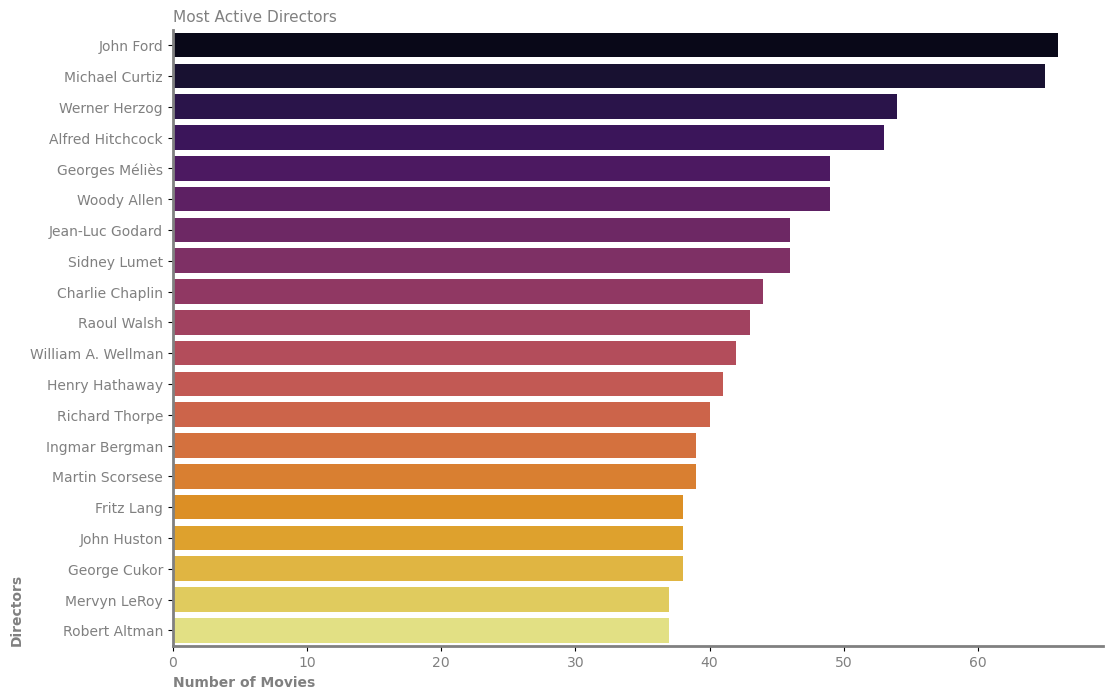

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.director.value_counts().head(20), y=df.director.value_counts().head(20).index, palette="inferno")
plt.title("Most Active Directors", color='grey', loc='left', fontsize=11)
plt.xlabel("Number of Movies", color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel("Directors", color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gca().axis()  # Invert y-axis to have the highest count at the top
plt.gcf().set_facecolor('white')
plt.show()


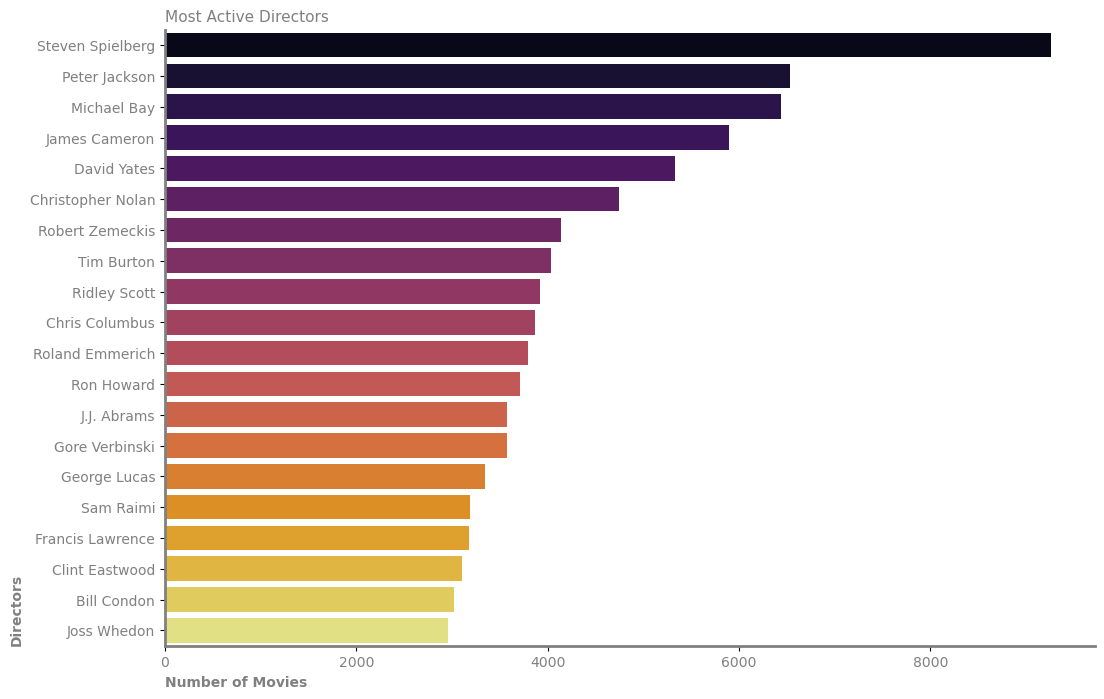

In [126]:

plt.figure(figsize=(12,8))
sns.barplot(x=df.groupby("director").revenue_musd.sum().nlargest(20), y=df.groupby("director").revenue_musd.sum().nlargest(20).index, palette="inferno")
plt.title("Most Active Directors", color='grey', loc='left', fontsize=11)
plt.xlabel("Number of Movies", color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel("Directors", color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gca().axis()  # Invert y-axis to have the highest count at the top
plt.gcf().set_facecolor('white')
plt.show()


In [138]:
directors = df.groupby("director").agg({"title": "count", "vote_average": "mean", "vote_count": "sum"})
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [139]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")


,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,14700.00
Christopher Nolan,11,7.62,67344.00
Quentin Tarantino,10,7.49,45910.00
Wes Anderson,10,7.37,11743.00
David Fincher,10,7.35,37588.00
Martin Scorsese,39,7.22,35541.00
Peter Jackson,13,7.14,47571.00
Joel Coen,17,7.02,18139.00
James Cameron,11,6.93,33736.00


In [141]:
df.genres = df.genres.astype(str)
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

## Most Successful Actors

7. __Find__ the __most Active Actor__

In [4]:
df.set_index("id",inplace=True)

In [5]:
act = df.cast.str.split("|", expand=True)
act = act.stack().reset_index(level=1,drop=True).to_frame()
act.columns = ["Actor"]
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]], how = "left", left_index = True, right_index=True)

In [6]:
act.Actor.value_counts().head(20)

Actor
Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: count, dtype: int64

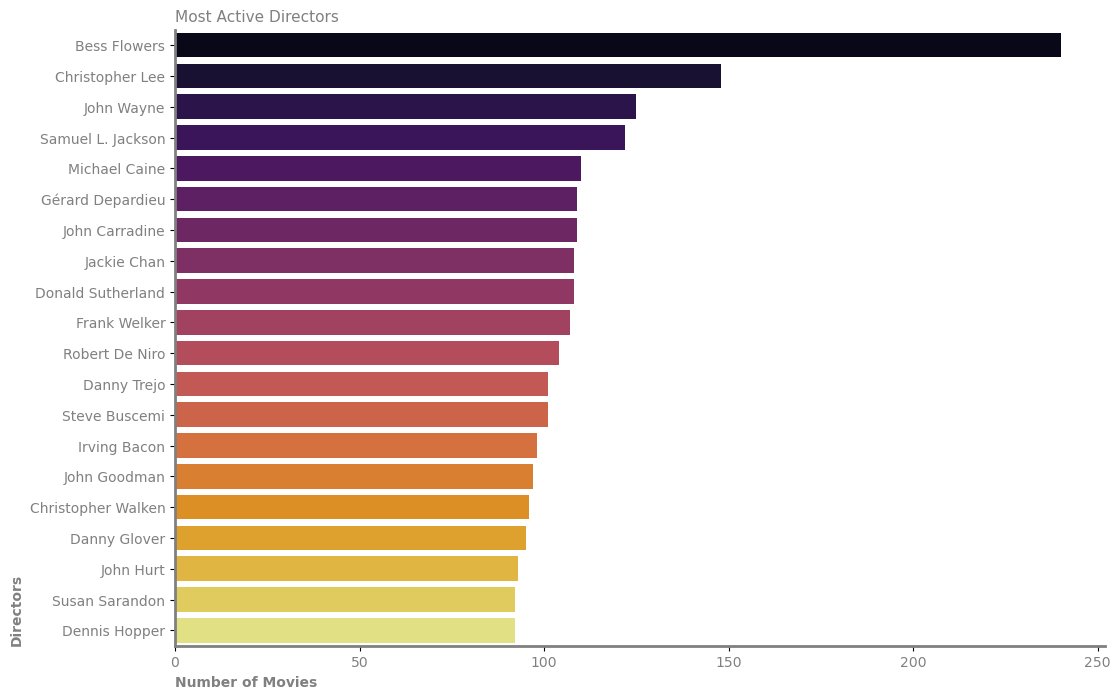

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(x=act.Actor.value_counts().head(20), y=act.Actor.value_counts().head(20).index, palette="inferno")
plt.title("Most Active Directors", color='grey', loc='left', fontsize=11)
plt.xlabel("Number of Movies", color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel("Directors", color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gca().axis()  # Invert y-axis to have the highest count at the top
plt.gcf().set_facecolor('white')
plt.show()

In [8]:
agg = act.groupby("Actor").agg(Total_revenue = ("revenue_musd", "sum"),
                               Mean_revenue = ("revenue_musd", "mean"),
                               Mean_rating = ("vote_average", "mean"), 
                               Mean_pop = ("popularity", "mean"),
                               Total_movies = ("Actor", "count")
                               )

In [9]:
agg.nlargest(10,"Total_movies")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movies
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [10]:
agg.nlargest(10,"Total_revenue")


,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movies
Actor,,,,,
Stan Lee,19414.96,647.17,6.51,29.94,48
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Warwick Davis,13256.03,662.80,6.29,13.09,34
Frank Welker,13044.15,326.10,6.31,9.57,107
John Ratzenberger,12596.13,449.86,6.48,10.96,46
Jess Harnell,12234.61,611.73,6.44,10.92,35
Hugo Weaving,11027.58,459.48,6.47,10.97,40
Ian McKellen,11015.59,478.94,6.35,15.45,44
Johnny Depp,10653.76,217.42,6.44,12.38,69


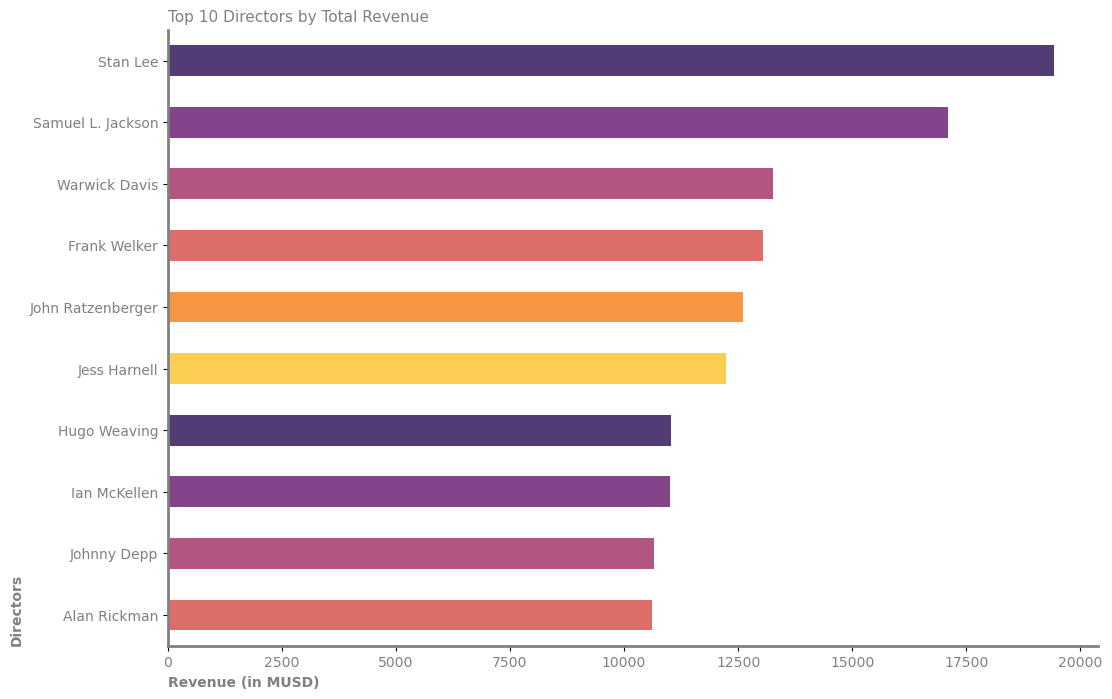

In [20]:
plt.figure(figsize=(12,8))
agg.Total_revenue.nlargest(10).plot(kind='barh', color=sns.color_palette("inferno"), alpha=0.8)
plt.title("Top 10 Directors by Total Revenue",  color='grey', loc='left', fontsize=11)
plt.xlabel("Revenue (in MUSD)",  color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel("Directors", color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.show()


In [22]:
agg[agg.Total_movies >= 10].nlargest(10,"Mean_revenue")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movies
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Zoë Wanamaker,976.48,976.48,6.33,6.82,10
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Philip Ng,821.71,821.71,5.92,6.35,10


In [23]:
agg[agg.Total_movies >= 10].nlargest(10,"Mean_rating")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movies
Actor,,,,,
Masao Hayama,0.00,NaN,8.84,0.32,10
David Attenborough,0.00,NaN,8.27,2.15,11
Emil Jannings,0.00,NaN,7.78,1.70,10
Halit Akçatepe,0.21,0.21,7.78,0.74,10
Yo Oizumi,511.21,102.24,7.72,7.51,13
Şener Şen,11.07,3.69,7.69,0.91,16
Ayşen Gruda,0.91,0.46,7.68,0.74,10
Akira Tani,0.33,0.16,7.65,5.04,12
Joseph Oliveira,3543.44,354.34,7.64,34.45,10


In [24]:
agg[agg.Total_movies >= 10].nlargest(10,"Mean_pop")

,Total_revenue,Mean_revenue,Mean_rating,Mean_pop,Total_movies
Actor,,,,,
Katy Mixon,1519.57,151.96,5.84,51.97,12
Terry Notary,6947.21,694.72,6.47,51.58,11
Goran D. Kleut,2568.94,366.99,6.00,42.32,10
Mark Smith,2195.52,243.95,6.55,40.08,11
Jon Hamm,3449.35,191.63,6.33,39.42,25
Gal Gadot,5449.53,495.41,6.33,37.39,11
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Joseph Oliveira,3543.44,354.34,7.64,34.45,10


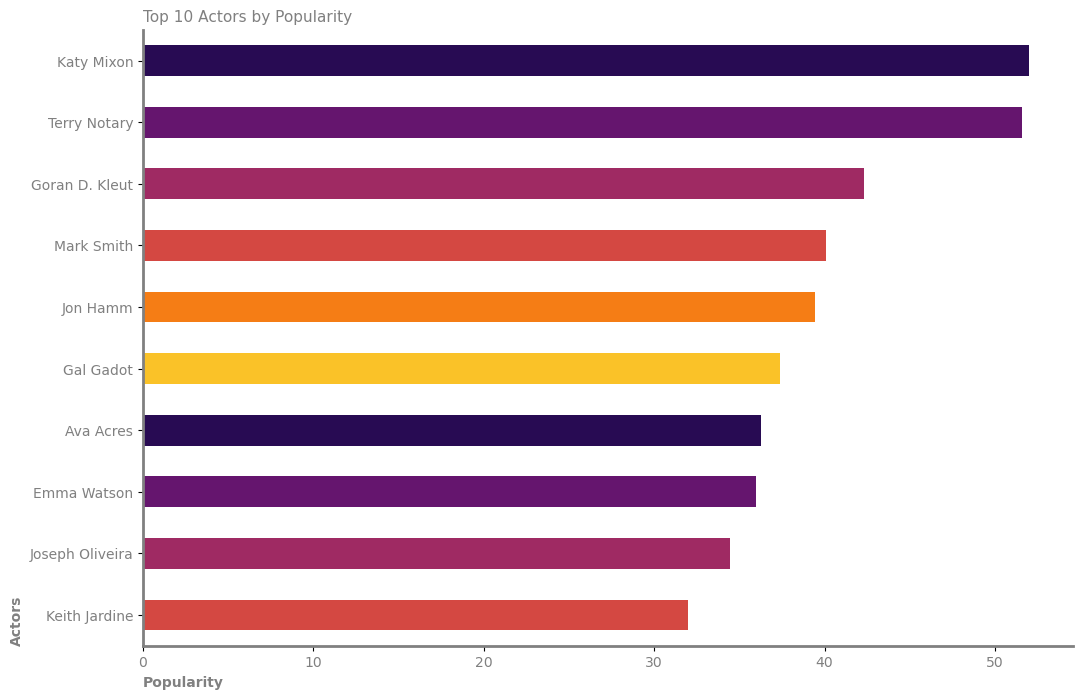

In [47]:
# agg[agg.Total_movies >= 10].nlargest(10,"Mean_rating").plot(kind='barh', color=sns.color_palette("inferno"), alpha=0.8)
agg[agg.Total_movies >= 10].nlargest(10, "Mean_pop").reset_index().plot(kind='barh', x='Actor', y='Mean_pop', color=sns.color_palette("inferno"),figsize=(12,8), legend=False)
plt.title("Top 10 Actors by Popularity",  color='grey', loc='left', fontsize=11)
plt.xlabel("Popularity",  color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel("Actors", color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.show()
